# Statistical Analysis

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os

Printing the steady state total agglomerate volume, steady state average agglomerate volume and steady state agglomerate density for each of the experiments.

In [87]:
bv = np.pi * (0.5 * 1.86) ** 2 * (260 * 0.04)
df = pd.DataFrame(columns=['exp', 'type', 'total_volume', 'average_volume', 'std_volume', 'density'])
for i, exp in enumerate(['P28A_FT_H_Exp1', 'P28A_FT_H_Exp2', 'P28A_FT_H_Exp3_3', 'P28A_FT_H_Exp4_2', 'P28A_FT_H_Exp5_3', 'VCT5_FT_N_Exp4', 'VCT5_FT_N_Exp5', 'VCT5A_FT_H_Exp2', 'VCT5A_FT_H_Exp5', 'VCT5_FT_N_Exp3']):
    temp = pd.read_csv(os.path.join("/Volumes/T7/Thesis", exp, "dataframe.csv"))
    unique_t = np.unique(temp['t'])
    filt = temp['t'] == unique_t[-1]
    if exp == 'VCT5_FT_N_Exp3':
        filt = temp['t'] == 3
        continue
    V = temp.loc[filt]['V'].values
    # print(exp)
    # print(f'Total volume: {np.sum(V):.1f}')
    # print(f'Average volume: {np.mean(V):.4f}, std: {np.std(V):.4f}')
    # print(f'Density: {len(V)/bv:.1f}\n')
    ty = 'N' if 'N' in exp else 'H'
    exp_name = 'P28A' if 'P28A' in exp else 'VCT5A'
    df.loc[i] = [exp_name, ty, np.sum(V), np.mean(V),  np.std(V), len(V)/bv]
df

,exp,type,total_volume,average_volume,std_volume,density
0,P28A,H,24.114880,0.030681,0.067608,27.814640
1,P28A,H,48.286976,0.024624,0.039386,69.395049
2,P28A,H,32.445504,0.022147,0.034869,51.842808
3,P28A,H,43.906816,0.022809,0.036387,68.121096
4,P28A,H,35.815552,0.027215,0.111168,46.570058
5,VCT5A,N,54.464960,0.032190,0.063061,59.875789
6,VCT5A,N,48.987520,0.040022,0.065103,43.314401
7,VCT5A,H,50.550784,0.049463,0.098763,36.166109
8,VCT5A,H,68.846208,0.065195,0.149424,37.369287


Plotting graphs for comparing the different features between the two battery types.

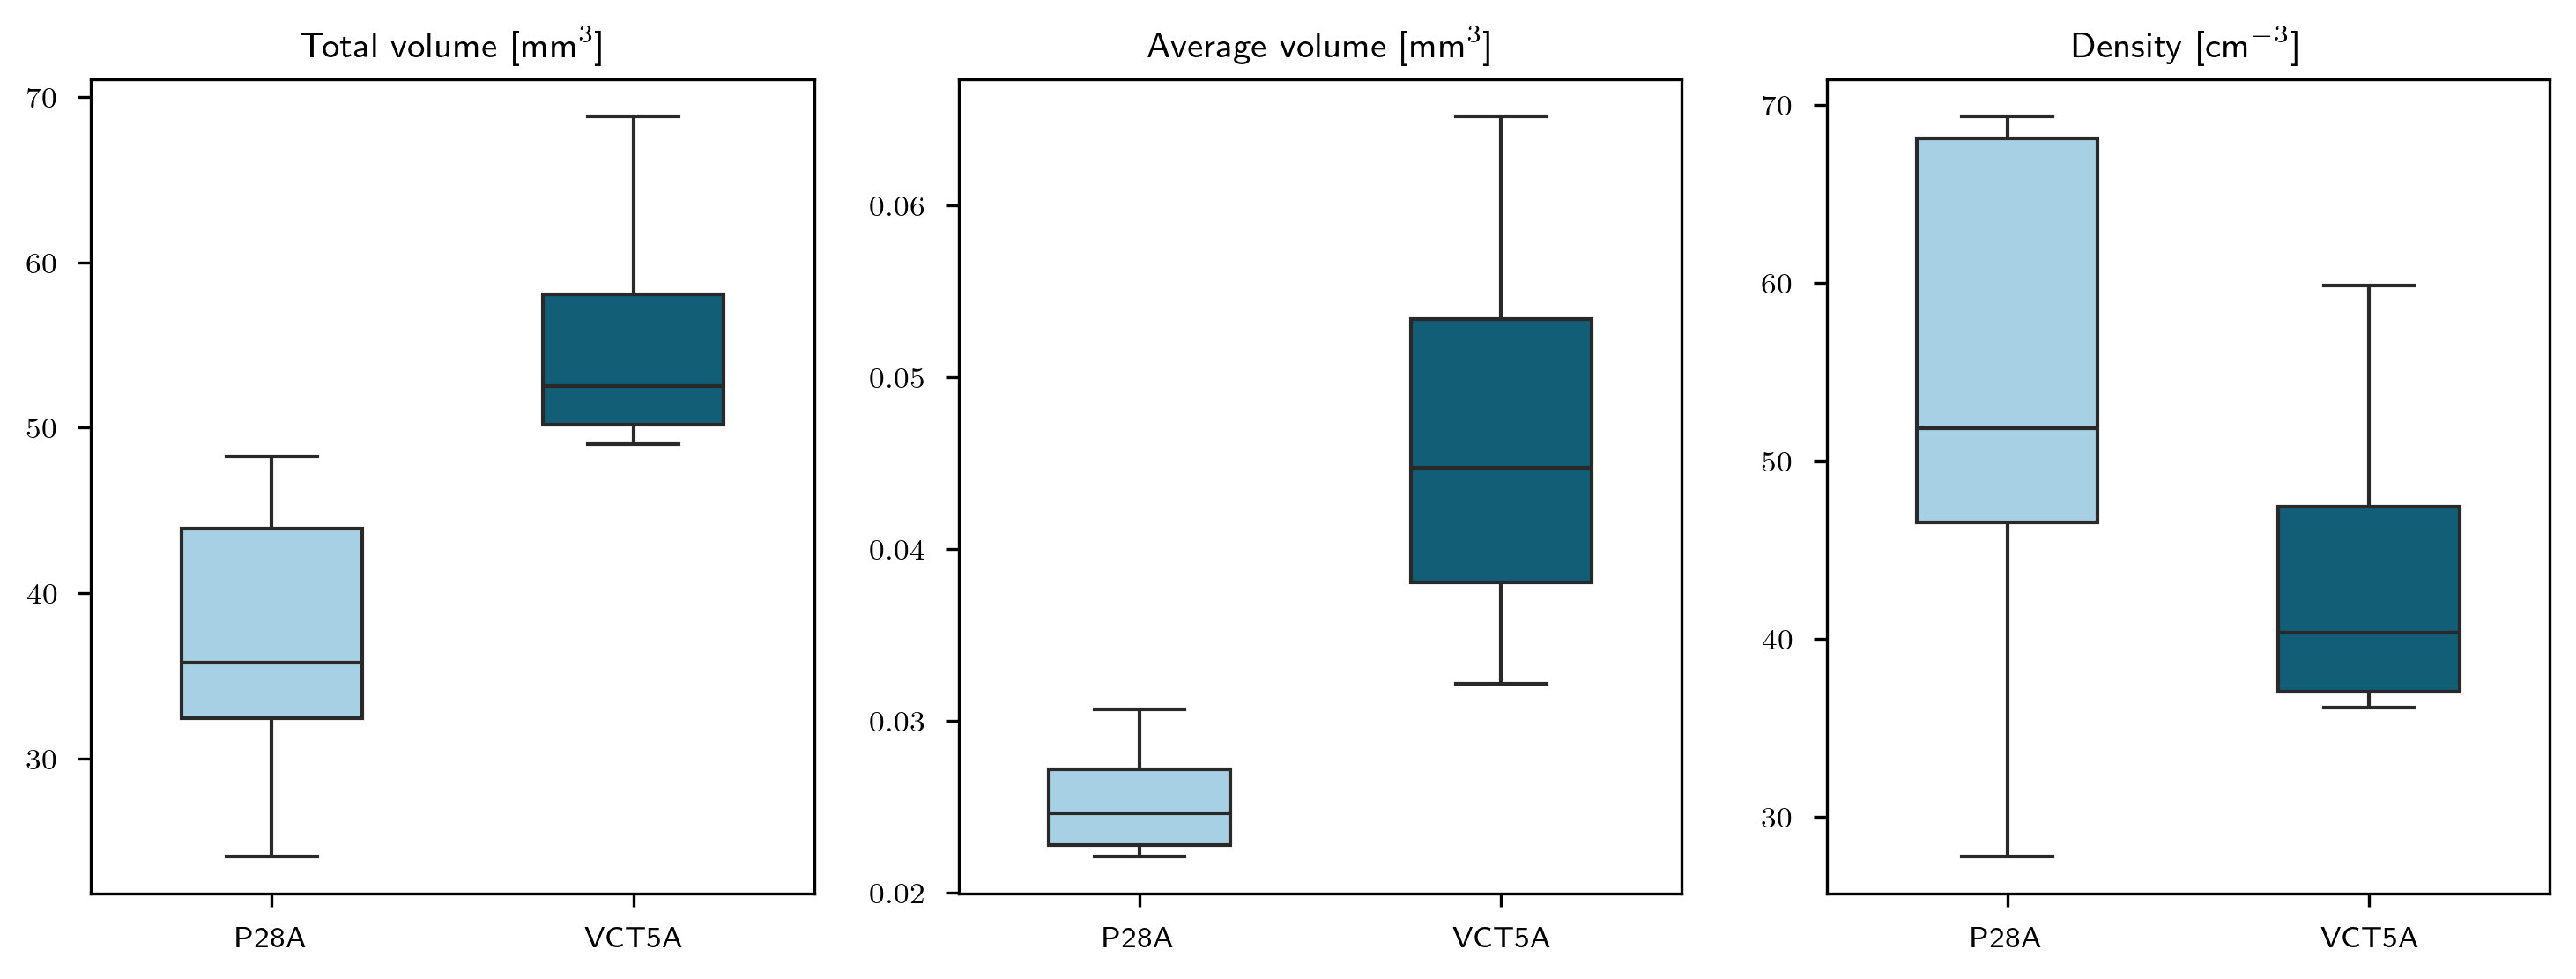

In [88]:
plt.style.use('seaborn-v0_8-muted')
plt.rcParams['text.usetex'] = True
palette = ["#9DD4EE", "#006787"]
fig, axs = plt.subplots(1, 3, figsize=(12, 4), dpi=300)
sns.boxplot(ax=axs[0], data=df, x='exp', y='total_volume', hue='exp', width=0.5, palette=palette)
sns.boxplot(ax=axs[1], data=df, x='exp', y='average_volume', hue='exp', width=0.5, palette=palette)
sns.boxplot(ax=axs[2], data=df, x='exp', y='density', hue='exp', width=0.5, palette=palette)
for i, ax in enumerate(axs):
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(['Total volume [mm$^3$]', 'Average volume [mm$^3$]', 'Density [cm$^{-3}$]'][i])

Oneway ANOVA test makes the following assumptions about the probability distributions of the responses:
- Independence of observations;
- Normality
- Homoscedasticity (equality of variances)

In our case the second and third assumptions are not valid:

- Shapiro wilk p-value for both VCT5A and P28A is equal to zero (data is not normally distributed for both experiments)
- `VCT5A_std > 2*P28A_std` (we cannot assume same variances)
This means that Oneway ANOVA test validity is not guaranteed.

Welch's t-test, or unequal variances t-test, is used to test the (null) hypothesis that two populations have equal means. It is designed for unequal population variances, but the assumption of normality is maintained. Yet, Welch's t-test is considered robust to violations of this assumption, especially when sample sizes are large. p-value is in the order of $10^{-17}$ in this case, so we can state that the mean of the two populations is different with statistical certainty.

In [89]:
P28A_V, VCT5A_V = [], []
for exp in ['P28A_FT_H_Exp1', 'P28A_FT_H_Exp2', 'P28A_FT_H_Exp3_3', 'P28A_FT_H_Exp4_2', 'P28A_FT_H_Exp5_3', 'VCT5A_FT_H_Exp2', 'VCT5A_FT_H_Exp5']:
    df = pd.read_csv(os.path.join("/Volumes/T7/Thesis", exp, "dataframe.csv"))
    unique_t = np.unique(df['t'])
    filt = df['t'] == unique_t[-1]
    V = df.loc[filt]['V'].values
    if 'P28A' in exp:
        P28A_V.append(V)
    else:
        VCT5A_V.append(V)

P28A_V = np.concatenate(P28A_V)
VCT5A_V = np.concatenate(VCT5A_V)

P28A_shapiro_stat, P28A_shapiro_pvalue = stats.shapiro(P28A_V)
VCT5A_shapiro_stat, VCT5A_shapiro_pvalue = stats.shapiro(VCT5A_V)
anova_fstat, anova_pvalue = stats.f_oneway(P28A_V, VCT5A_V)
welch_tstat, welch_pvalue = stats.ttest_ind(P28A_V, VCT5A_V, equal_var=False)


/Users/matteoventurelli/miniconda3/envs/test/lib/python3.8/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [90]:
print(f'P28A mean: {np.mean(P28A_V):.3f}, std: {np.std(P28A_V):.3f}')
print(f'VCT5A mean: {np.mean(VCT5A_V):.3f}, std: {np.std(VCT5A_V):.3f}')
print(f'P28A_shapiro_stat: {P28A_shapiro_stat:e}')
print(f'P28A_shapiro_pvalue: {P28A_shapiro_pvalue:e}')
print(f'VCT5A_shapiro_stat: {VCT5A_shapiro_stat:e}')
print(f'VCT5A_shapiro_pvalue: {VCT5A_shapiro_pvalue:e}')
print(f'anova_fstat: {anova_fstat:e}, anova_pvalue: {anova_pvalue:e}')
print(f'welch_tstat: {welch_tstat:e}, welch_pvalue: {welch_pvalue:e}')

P28A mean: 0.025, std: 0.061
VCT5A mean: 0.057, std: 0.127
P28A_shapiro_stat: 2.457016e-01
P28A_shapiro_pvalue: 0.000000e+00
VCT5A_shapiro_stat: 4.264061e-01
VCT5A_shapiro_pvalue: 0.000000e+00
anova_fstat: 2.715079e+02, anova_pvalue: 3.603044e-60
welch_tstat: -1.135236e+01, welch_pvalue: 4.094604e-29


In [91]:
df = pd.DataFrame(columns = ['Battery type', 'V'])
for j, el in enumerate(VCT5A_V):
    df.loc[j] = ['VCT5A', el]
for i, el in enumerate(P28A_V):
    df.loc[i+j] = ['P28A', el]

df2 = pd.DataFrame(columns = ['Battery type', 'V'])
for i, el in enumerate(P28A_V):
    df2.loc[i] = ['P28A', el]
for j, el in enumerate(VCT5A_V):
    df2.loc[i+j] = ['VCT5A', el]
    
a = np.arange(0, 7452, 3)
b = np.arange(7452, 7452+2078)
c = np.concatenate([a, b])
df2 = df2.iloc[c]

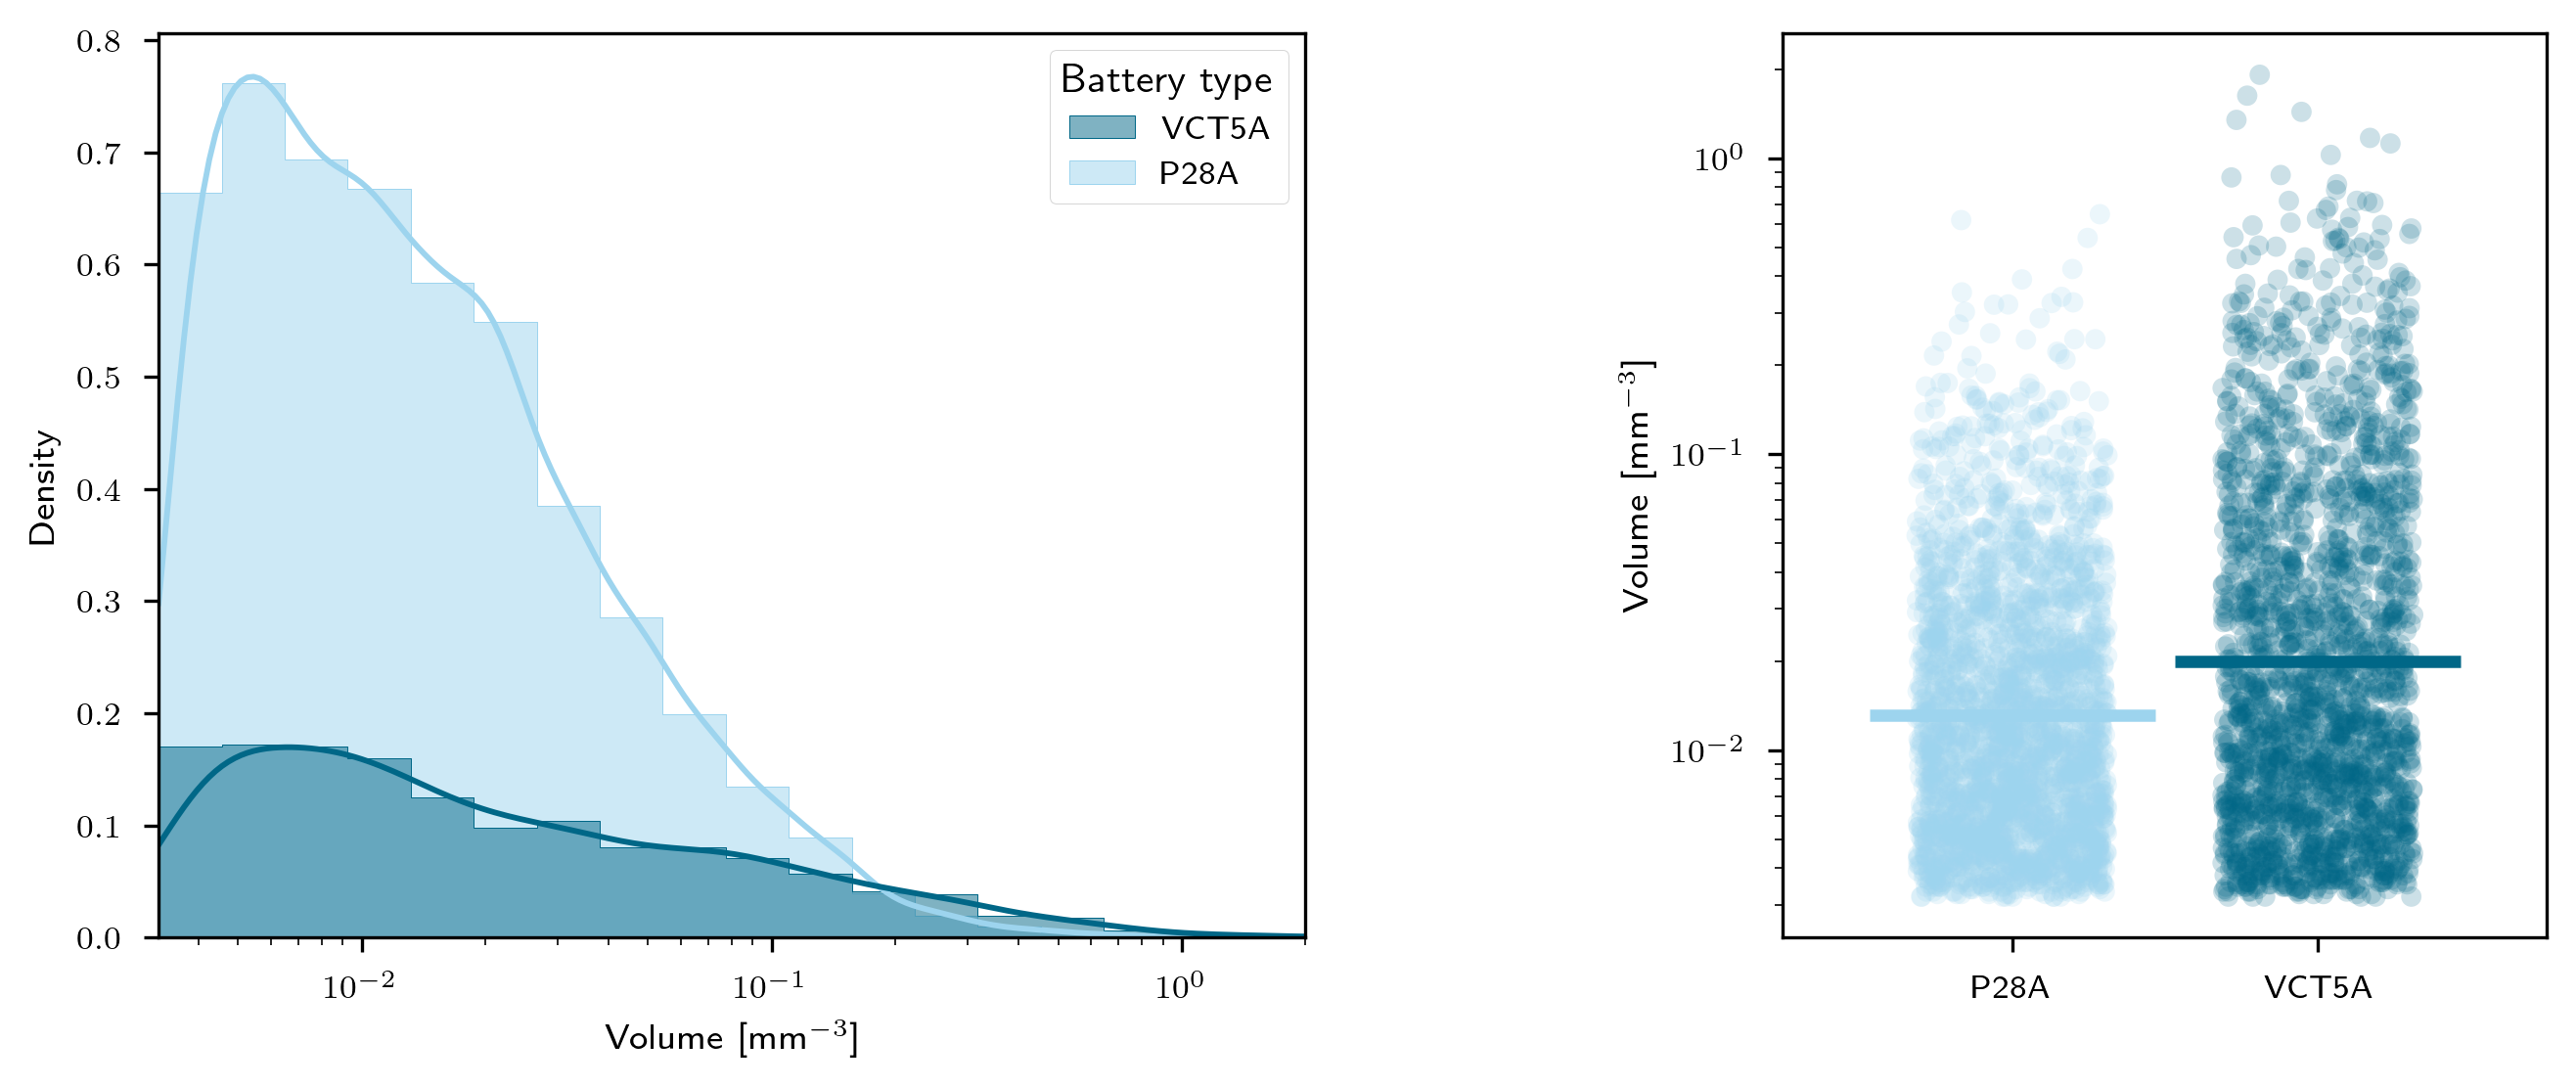

In [92]:
x_min = 0.0032
x_max = 2
palette = ["#9DD4EE", "#006787"] #7cc5e8  B5DEF2
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10.5, 4), width_ratios=[3, 2], dpi=300)
plt.subplots_adjust(wspace=0.5)
df.columns = ['Battery type', 'V']
sns.histplot(ax=ax1, data=df, x='V', hue='Battery type', palette=palette[::-1], kde=True, log_scale=True, fill=True, alpha=0.5, bins=20, element='step', stat='density') # bins=np.logspace(np.log10(x_min), np.log10(x_max), 50)
ax1.set_xlim(x_min, x_max)
ax1.set_xlabel('Volume [mm$^{-3}$]')

# palette = ["#D7EDF8", "#96C4D5"]
# palette = ["#7cc5e8", "#006787"]
# sns.boxplot(ax=ax2, data=df, x='Battery type', y='V', hue='Battery type', width=0.5, palette=palette, log_scale=True)
# ax2.set_xlabel('')
# ax2.set_ylabel('Volume [mm$^{-3}$]')
# ax2.set_ylim(0.002, 3)

sns.stripplot(
    ax=ax2, data=df2,  y="V", hue="Battery type",
    dodge=True, alpha=.2, legend=False, log_scale=True, palette=palette, jitter=0.25
)
sns.pointplot(
    ax=ax2, data=df2,  y="V", hue="Battery type",
    dodge=.4, linestyle="none", errorbar=None,
    marker="_", markersize=70, legend=False, markeredgewidth=3, log_scale=True, palette=palette
)

ax2.set_ylabel('Volume [mm$^{-3}$]')
ax2.set_xticks([-0.2, 0.2], ['P28A', 'VCT5A'])

In [ ]:
# xlim = 0.2
# kde_factor = 23
# bins = np.linspace(0, xlim, 50)
# xx = np.linspace(0, xlim, 100)
# fig, ax = plt.subplots(figsize=(10, 6), dpi=150)

# ax.hist(P28A_V, bins=bins, alpha=0.5, label='P28A')
# kde_P28A = stats.gaussian_kde(P28A_V)
# ax.plot(xx, kde_P28A(xx)*kde_factor, label='P28A kde', color=sns.color_palette()[0])

# ax.hist(VCT5A_V, bins=bins, alpha=0.5, label='VCT5A')
# kde_VCT5A = stats.gaussian_kde(VCT5A_V)
# ax.plot(xx, kde_VCT5A(xx)*kde_factor, label='VCT5A kde', color=sns.color_palette()[1])

# # ax.plot(xx, norm.pdf(xx, 0.02, 0.05)*20, label='Gaussian', color=sns.color_palette()[2], linestyle='--')
# #ax.plot(xx, stats.cauchy.pdf((xx-0.01)*70)*2300, label='Cauchy 1', color=sns.color_palette()[3], linestyle='--')
# #ax.plot(xx, stats.cauchy.pdf((xx-0.017)*19)*630, label='Cauchy 2', color=sns.color_palette()[4], linestyle='--')

# ax.set_xlim(0, xlim)
# ax.set_xlabel('Volume [$mm^{-3}$]')
# _ = ax.legend()

# Miscellaneous

Rename `hypervolume.npy` into `ct.npy` and `hypervolume_mask.npy` into `mask.npy`

In [ ]:
import os
path = '/Volumes/T7/Thesis/'
for folder in os.listdir(path):
    if folder == '.DS_Store':
        continue
    if os.path.exists(os.path.join(path, folder, 'hypervolume.npy')):
        os.rename(os.path.join(path, folder, 'hypervolume.npy'), os.path.join(path, folder, 'ct.npy'))
    if os.path.exists(os.path.join(path, folder, 'hypervolume_mask.npy')):
        os.rename(os.path.join(path, folder, 'hypervolume_mask.npy'), os.path.join(path, folder, 'mask.npy'))

Threshold for `P28B_ISC_FT_H_Exp2` should be 0.7, threshold for `VCT5_FT_N_Exp1` should be 1

In [ ]:
import fasttomo
# from skimage.io import imshow
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(12, 7))
data1 = fasttomo.Data('P28B_ISC_FT_H_Exp2')
ct1 = data1.ct
axs[0].imshow(ct1[20,20]>0.7, cmap='gray')
axs[0].set_title('P28B_ISC_FT_H_Exp2')
data2 = fasttomo.Data('VCT5A_FT_H_Exp4')
ct2 = data2.ct
axs[1].imshow(ct2[5,20]>0.8, cmap='gray')
_ = axs[1].set_title('VCT5A_FT_H_Exp4')

Merging and cropping the original files `volume_v2` obtained by Matilda's code

In [ ]:
import numpy as np
from numpy.lib.format import open_memmap  
from tqdm import tqdm
import os

exp = 'VCT5_FT_N_Exp1'
parent_path = f'/Volumes/T7/Thesis/{exp}'
folders = sorted(os.listdir(parent_path))
del folders[-1]
ct = open_memmap(os.path.join(parent_path, 'hypervolume.npy'), dtype=np.half, mode='w+', shape=(len(folders), 260, 700, 700))
progress_bar = tqdm(total=len(folders), desc='Copying volumes')
for t, folder in enumerate(folders):
    temp = open_memmap(os.path.join(parent_path, folder, 'volume_v2.npy'), mode='r')
    ct[t] = temp[15:275, 108:808, 144:844]
    progress_bar.update()
progress_bar.close()

Convert `.stl` mesh into `.obj`

In [7]:
from stl_to_obj import stl_to_obj
import os

exp = 'P28B_ISC_FT_H_Exp2'
parent_path = f'/Volumes/T7/Thesis/{exp}/sidewall_stls'
stl_to_obj.stl_to_obj(os.path.join(parent_path, '000', '00000.stl'), os.path.join(parent_path, '000', '00000.obj'))

Save slice

In [12]:
import fasttomo
from skimage.io import imsave
from PIL import Image
import os

time = 13
z = 245
exp = 'P28B_ISC_FT_H_Exp4'
contrast_limits = [0.1, 3.5]

data = fasttomo.Data(exp)
image = np.copy(data.ct[time, z])
image[image < contrast_limits[0]] = contrast_limits[0]
image[image > contrast_limits[1]] = contrast_limits[1]
image = 255 * (image - contrast_limits[0]) / (contrast_limits[1] - contrast_limits[0])
image = image.astype(np.uint8)
image = 255 - image
# image = Image.fromarray(image)
imsave(os.path.join('/Volumes/T7/Thesis',
                    exp, 
                    str(time).zfill(3) + "-" + str(z).zfill(3) + ".png"), image)

Save colored segmentation slice

In [ ]:
from napari.utils.colormaps import label_colormap
import matplotlib.pyplot as plt
import numpy as np
from skimage.color import label2rgb
import fasttomo

exp = "P28B_ISC_FT_H_Exp2"
data = fasttomo.Data(exp)
mask_slice = data.mask[107,145]
ct_slice = np.ones(mask_slice.shape)
plt.figure(figsize=(8, 8))
cmap = np.array([(213,  62,  79,  1),(102,  194,  165,  1), (50,  136,  189,  1), (158,  1,  66,  1),  (244,  109,  67,  1), (253,  174,  97,  1), (254,  224,  139,  1), (230,  245,  152,  1), (171,  221,  164,  1),  (94,  79,  162,  1)])/255
cmap = list(cmap)
plt.imsave("/Users/matteoventurelli/Downloads/Segmented-2.png", label2rgb(mask_slice[70:-70,70:-70], alpha=1, bg_color='white', colors=cmap))

# Agglomerate plots

`P28A_FT_H_Exp4_2`

Text(2.22, 73.5, '$($c$)$')

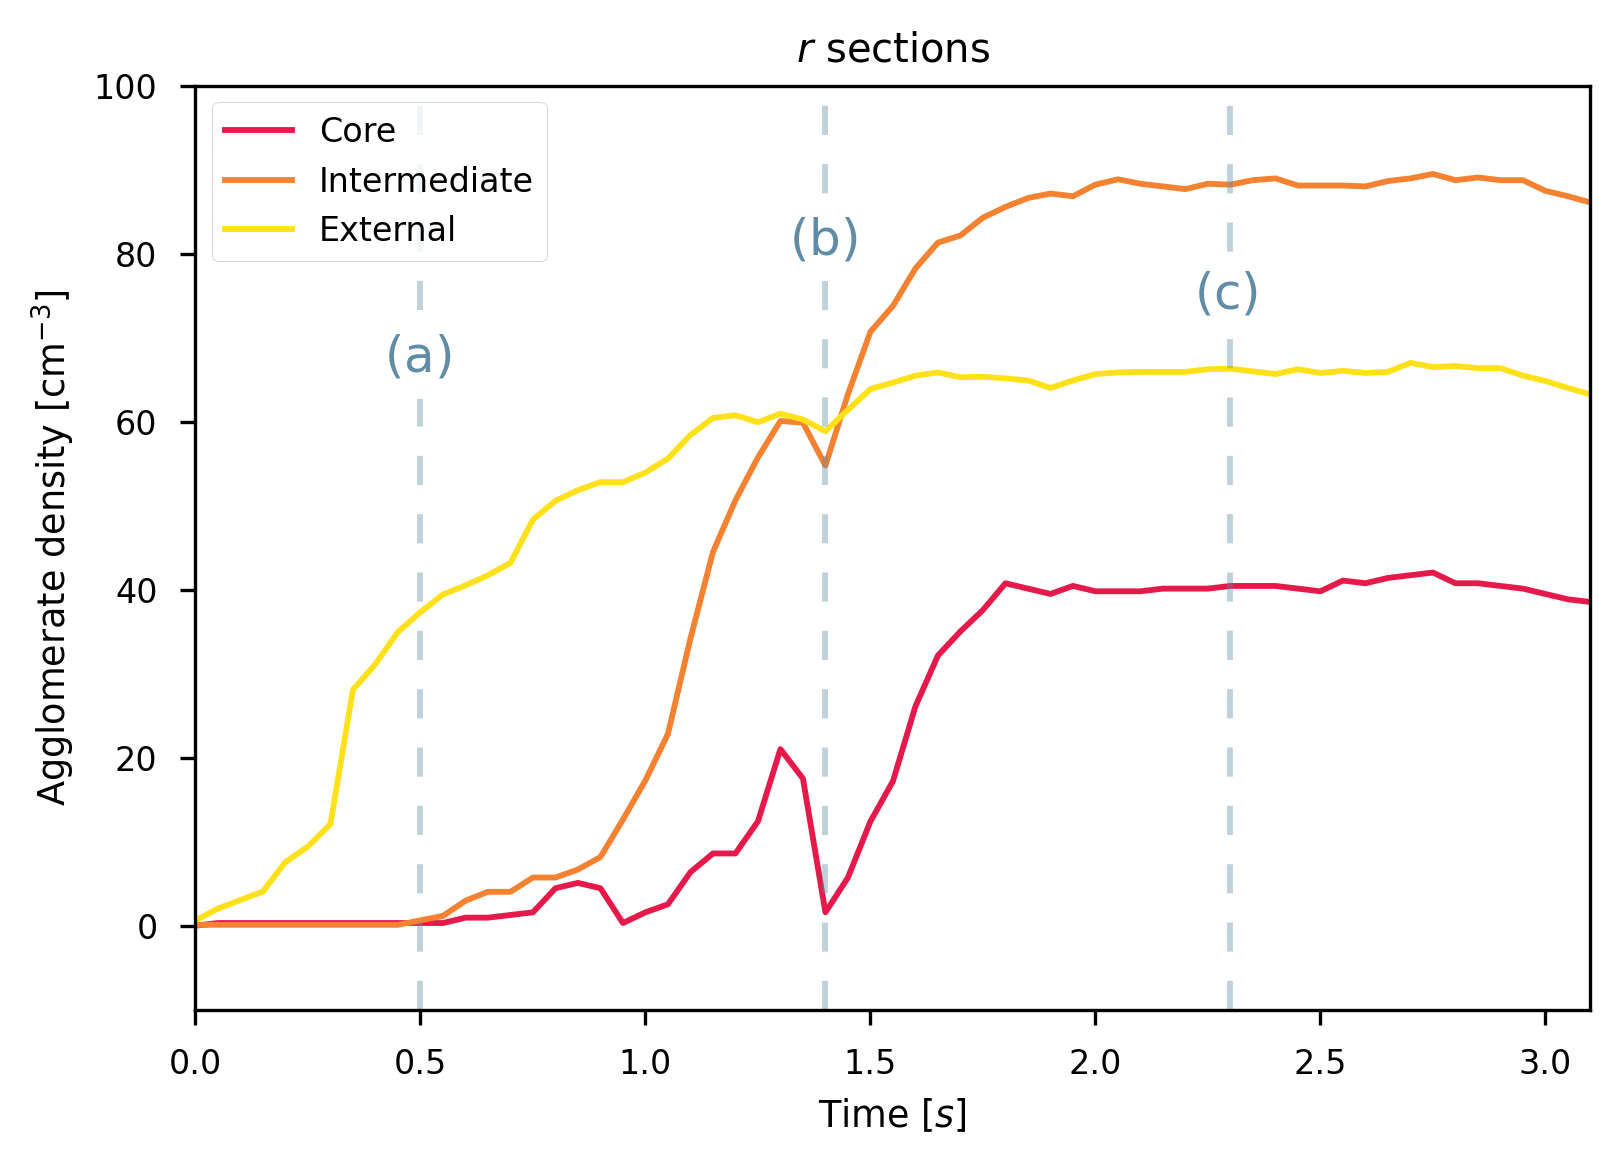

In [2]:
import fasttomo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

data = fasttomo.Data('P28A_FT_H_Exp4_2')
try:
    data.df = pd.read_csv(os.path.join(data.path, "dataframe.csv"))
except FileNotFoundError:
    print("Dataframe not found, run Data.create_dataframe() first!")
    pass
data._R_SECTIONS_STRING = ["Core", "Intermediate", "External"]
data._Z_SECTIONS_STRING = ["Top", "Middle", "Bottom"]
test_t = data.df["t"][0]
data.df["t"] = data.df["t"] - data.df["t"][0]
df_tot, df_r, df_z = data._load_df_tot(), data._load_df_r(), data._load_df_z()
time_axis = np.arange(len(np.unique(data.df["t"]))) / 20
plt.style.use("seaborn-v0_8-paper")
palette1 = ["#3cb44b", "#bfef45"]
palette2 = ["#e6194B", "#f58231", "#ffe119"]
palette3 = ["#000075", "#4363d8", "#42d4f4"]
palettes = [palette1, palette2, palette3]
sns.set_palette(sns.color_palette(palette1))
battery_volume = np.pi * (0.5 * 1.86) ** 2 * (260 * 0.04)
df_r.loc[df_r["r_section"] == "Core", "N"] = df_r.loc[
    df_r["r_section"] == "Core", "N"
] / (battery_volume / 9)
df_r.loc[df_r["r_section"] == "Intermediate", "N"] = df_r.loc[
    df_r["r_section"] == "Intermediate", "N"
] / (battery_volume * 3 / 9)
df_r.loc[df_r["r_section"] == "External", "N"] = df_r.loc[
    df_r["r_section"] == "External", "N"
] / (battery_volume * 5 / 9)
fig, ax = plt.subplots(figsize=(6,4), dpi=300)
sns.lineplot(
    data=df_r,
    x="t",
    y="N",
    hue="r_section",
    hue_order=data._R_SECTIONS_STRING,
    palette=palettes[1],
)
ax.set_xlim(time_axis[0], time_axis[-1])
ax.set_ylim(-10, 100)
ax.set_xlabel("Time [$s$]")
ax.set_ylabel('Agglomerate density [cm$^{-3}$]')
ax.legend(loc="upper left")
ax.set_title("$r$ sections")
color = '#608CA5'
ax.vlines([0.5, 1.4, 2.3], -10, 100, color=color, linestyle=(0, (5, 5)), alpha=0.4) # 1.4
ax.text(0.42, 66, '$($a$)$', fontsize=12, color=color, backgroundcolor='white')
ax.text(1.32, 80, '$($b$)$', fontsize=12, color=color, backgroundcolor='white')
ax.text(2.22, 73.5, '$($c$)$', fontsize=12, color=color, backgroundcolor='white')

`VCT5_FT_N_Exp4`

Text(2.606, 80, '$($c$)$')

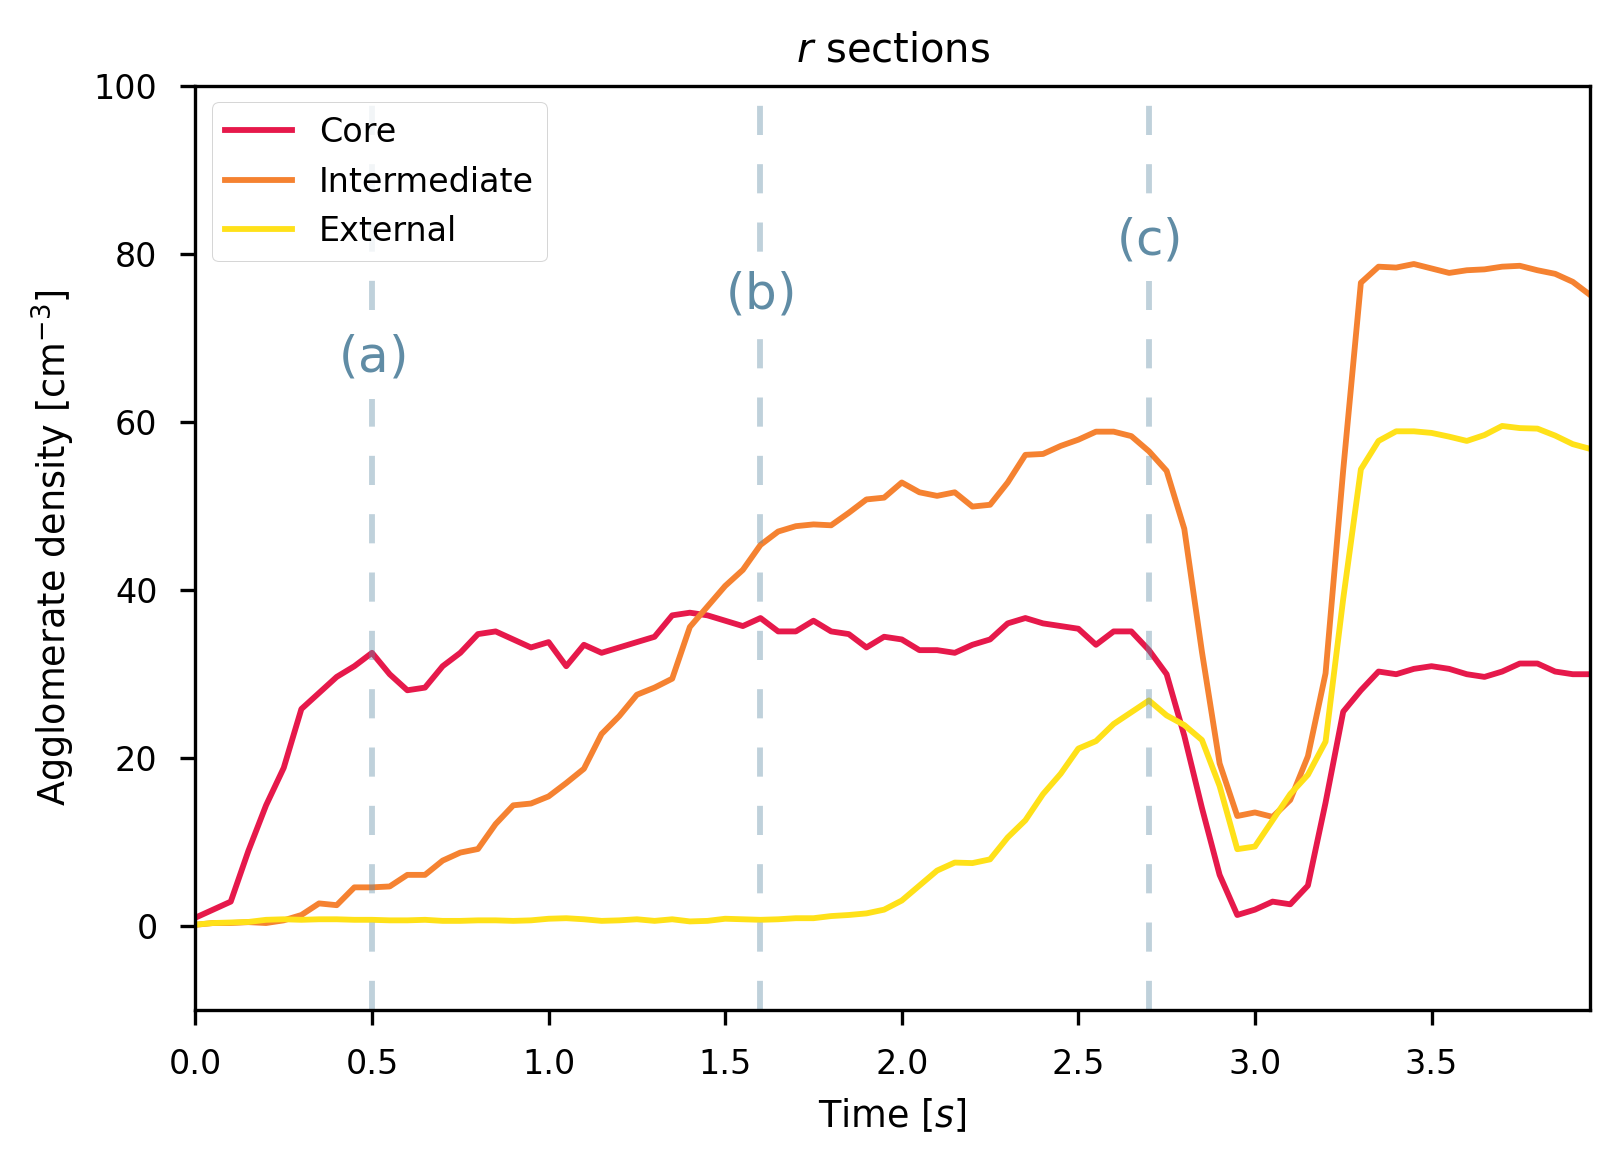

In [7]:
import fasttomo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

data = fasttomo.Data('VCT5_FT_N_Exp4')
try:
    data.df = pd.read_csv(os.path.join(data.path, "dataframe.csv"))
except FileNotFoundError:
    print("Dataframe not found, run Data.create_dataframe() first!")
    pass
data._R_SECTIONS_STRING = ["Core", "Intermediate", "External"]
data._Z_SECTIONS_STRING = ["Top", "Middle", "Bottom"]
test_t = data.df["t"][0]
data.df["t"] = data.df["t"] - data.df["t"][0]
df_tot, df_r, df_z = data._load_df_tot(), data._load_df_r(), data._load_df_z()
time_axis = np.arange(len(np.unique(data.df["t"]))) / 20
plt.style.use("seaborn-v0_8-paper")
palette1 = ["#3cb44b", "#bfef45"]
palette2 = ["#e6194B", "#f58231", "#ffe119"]
palette3 = ["#000075", "#4363d8", "#42d4f4"]
palettes = [palette1, palette2, palette3]
sns.set_palette(sns.color_palette(palette1))
battery_volume = np.pi * (0.5 * 1.86) ** 2 * (260 * 0.04)
df_r.loc[df_r["r_section"] == "Core", "N"] = df_r.loc[
    df_r["r_section"] == "Core", "N"
] / (battery_volume / 9)
df_r.loc[df_r["r_section"] == "Intermediate", "N"] = df_r.loc[
    df_r["r_section"] == "Intermediate", "N"
] / (battery_volume * 3 / 9)
df_r.loc[df_r["r_section"] == "External", "N"] = df_r.loc[
    df_r["r_section"] == "External", "N"
] / (battery_volume * 5 / 9)
fig, ax = plt.subplots(figsize=(6,4), dpi=300)
sns.lineplot(
    data=df_r,
    x="t",
    y="N",
    hue="r_section",
    hue_order=data._R_SECTIONS_STRING,
    palette=palettes[1],
)
ax.set_xlim(time_axis[0], time_axis[-1])
ax.set_ylim(-10, 100)
ax.set_xlabel("Time [$s$]")
ax.set_ylabel('Agglomerate density [cm$^{-3}$]')
ax.legend(loc="upper left")
ax.set_title("$r$ sections")
color = '#608CA5'
ax.vlines([0.5, 1.6, 2.7], -10, 100, color=color, linestyle=(0, (5, 5)), alpha=0.4) # 1.4
ax.text(0.405, 66, '$($a$)$', fontsize=12, color=color, backgroundcolor='white')
ax.text(1.5, 73.5, '$($b$)$', fontsize=12, color=color, backgroundcolor='white')
ax.text(2.606, 80, '$($c$)$', fontsize=12, color=color, backgroundcolor='white')

In [72]:
test_t

0.2

`VCT5A_FT_H_Exp5`